<a href="https://colab.research.google.com/github/kamilenovaes/machine-learning-python/blob/main/notebooks/10-k-means-clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering


## 🎯 Objetivos


- Usar o K-Means do `scikit-learn` para **clusterizar** (agrupar) dados.
- Aplicar K-Means em um caso real de **segmentação de clientes**.


## Introdução

O **K-Means** é um dos algoritmos mais usados para **clusterização** em Ciência de Dados. Ele é especialmente útil quando queremos descobrir padrões em **dados sem rótulo** (unlabeled), isto é, sem uma variável-alvo.

Exemplos de uso no mundo real:

- Segmentação de clientes
- Entender perfis de visitantes de um site
- Reconhecimento de padrões
- *Feature engineering*
- Compressão de dados


## 1. Bibliotecas



In [158]:
# opcional
#!pip -q install numpy pandas matplotlib scikit-learn plotly seaborn


In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

import plotly.express as px
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


## 2. Conjunto de dados sintético

Antes de ir para um dataset real, vamos criar um conjunto de dados **artificial** para entender o comportamento do algoritmo.

Primeiro, definimos uma *random seed* para garantir reprodutibilidade (ou seja, obter os mesmos resultados ao rodar novamente).


In [160]:
np.random.seed(0)


Em seguida, vamos gerar “nuvens” de pontos com a função `make_blobs`.

### 2.1. Entradas que vamos usar

- `n_samples`: quantidade total de pontos (distribuídos entre os clusters).  
  **Valor:** `5000`
- `centers`: posições dos centros (ou quantidade de centros).  
  **Valor:** `[[4,4], [-2,-1], [2,-3], [1,1]]`
- `cluster_std`: desvio padrão dos clusters (o “espalhamento” de cada nuvem).  
  **Valor:** `0.9`

### 2.2. Saída

- `X`: matriz de features com shape `(n_samples, n_features)` (neste caso, 2D).
- `y`: rótulos “verdadeiros” dos blobs (vamos **ignorar** no K-Means, pois ele é não supervisionado).


In [161]:
# Gerando blobs (nuvens) sintéticos
X, y = make_blobs(
    n_samples=5000,
    centers=[[4, 4], [-2, -1], [2, -3], [1, 1]],
    cluster_std=0.9
)


Vamos visualizar o espalhamento (*scatter plot*) dos dados gerados.

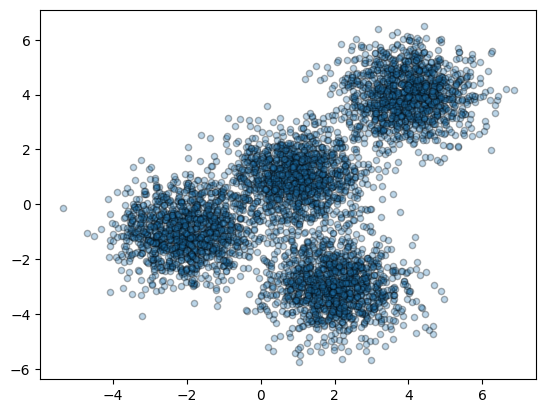

In [162]:
plt.scatter(X[:, 0], X[:, 1], marker=".", alpha=0.3, ec="k", s=80)


## 3. Preparando o K-Means

Agora que temos os dados, vamos configurar e rodar o **K-Means**.


A classe `KMeans` possui vários parâmetros. Aqui vamos usar os principais:

- `init`: como os centróides iniciais são escolhidos.  
  **Valor:** `k-means++` (inicialização “inteligente” que costuma acelerar a convergência)
- `n_clusters`: número de clusters (k).  
  **Valor:** `4` (porque criamos 4 centros no dataset sintético)
- `n_init`: quantas inicializações diferentes o algoritmo tentará. O resultado final é o melhor entre elas (menor **inércia**).  
  **Valor:** `12`

Vamos inicializar o modelo em `k_means`.


In [163]:
# Inicializando o K-Means
k_means = KMeans(init="k-means++", n_clusters=4, n_init=12) #, random_state=42


Agora vamos **ajustar** (*fit*) o modelo `KMeans` usando a matriz de features `X`.

In [164]:
# Treinando o modelo (ajuste dos centróides)
k_means.fit(X)


KMeans(n_clusters=4, n_init=12)

Depois do treinamento, vamos obter o **rótulo do cluster** atribuído a cada ponto via `k_means.labels_`.

In [165]:
# Rótulo (cluster) atribuído a cada ponto
k_means_labels = k_means.labels_
k_means_labels


array([0, 3, 3, ..., 1, 0, 0], dtype=int32)

Também vamos obter as coordenadas dos **centróides** com `k_means.cluster_centers_`.

In [166]:
# Coordenadas dos centróides (centros dos clusters)
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers


array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

## 4. Visualização

Com os dados gerados e o modelo treinado, vamos plotar o resultado para ver como o K-Means separou os clusters.


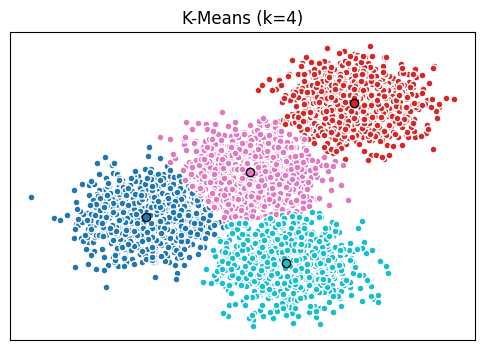

In [167]:
# Inicializa a figura
fig = plt.figure(figsize=(6, 4))

# Gera uma paleta com base na quantidade de clusters encontrados
colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means_labels))))

ax = fig.add_subplot(1, 1, 1)

# Plota pontos e centróides cluster a cluster
for k, col in zip(range(len(k_means_cluster_centers)), colors):
    # Máscara booleana dos pontos que pertencem ao cluster k
    my_members = (k_means_labels == k)

    # Centróide do cluster k
    cluster_center = k_means_cluster_centers[k]

    # Pontos do cluster
    ax.plot(
        X[my_members, 0], X[my_members, 1],
        "w", markerfacecolor=col, marker=".", ms=10
    )

    # Centróide do cluster
    ax.plot(
        cluster_center[0], cluster_center[1],
        "o", markerfacecolor=col, markeredgecolor="k", markersize=6
    )

ax.set_title("K-Means (k=4)")
ax.set_xticks(())
ax.set_yticks(())
plt.show()


### Exercício 1

Tente clusterizar o dataset acima com um número diferente de clusters, por exemplo **k = 3**.  
Observe como o padrão muda.


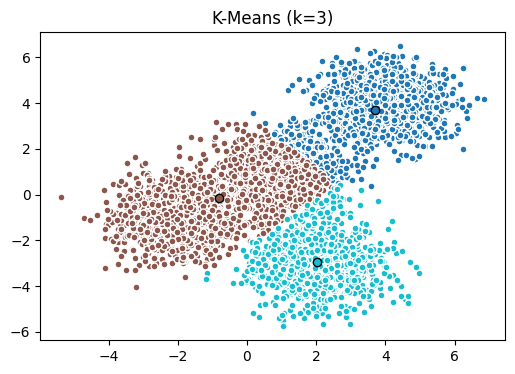

In [168]:
# k = 3
k_means3 = KMeans(init="k-means++", n_clusters=3, n_init=12) #, random_state=42
k_means3.fit(X)

fig = plt.figure(figsize=(6, 4))
colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], "w", markerfacecolor=col, marker=".", ms=10)
    ax.plot(cluster_center[0], cluster_center[1], "o", markerfacecolor=col, markeredgecolor="k", markersize=6)

plt.title("K-Means (k=3)")
plt.show()


### Exercício 2

Repita com **k = 5**.


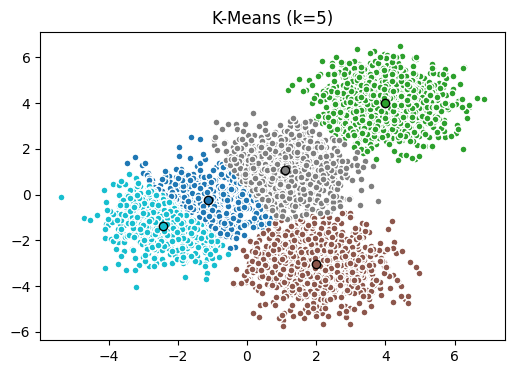

In [169]:
# k = 5
k_means5 = KMeans(init="k-means++", n_clusters=5, n_init=12) #, random_state=42
k_means5.fit(X)

fig = plt.figure(figsize=(6, 4))
colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means5.labels_))))
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len(k_means5.cluster_centers_)), colors):
    my_members = (k_means5.labels_ == k)
    cluster_center = k_means5.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], "w", markerfacecolor=col, marker=".", ms=10)
    ax.plot(cluster_center[0], cluster_center[1], "o", markerfacecolor=col, markeredgecolor="k", markersize=6)

plt.title("K-Means (k=5)")
plt.show()


### Exercício 3

Comente sobre a **inércia** (*within-cluster sum of squares*) dos modelos para **k = 3** e **k = 5**.


- **k = 3:** a inércia tende a ser **maior** do que em k=4 (nosso “k natural”), porque alguns grupos “naturais” acabam sendo *fundidos* (subajuste / *underfitting*).
- **k = 5:** a inércia tende a ser **menor** do que em k=4, porque o algoritmo cria mais grupos do que o necessário e “quebra” clusters em partes menores (sobreajuste / *overfitting*).



## 5. Segmentação de clientes com K-Means

Considerando um dataset histórico de clientes para fazer **segmentação**.

**Segmentação de clientes** é a prática de dividir a base em grupos com características semelhantes. Isso ajuda o negócio a:

- direcionar campanhas e ofertas para perfis específicos,
- usar melhor recursos de marketing e atendimento,
- identificar grupos valiosos (alto lucro/baixo risco, maior propensão de compra, etc.),
- aumentar retenção e reduzir churn.


## 6. Carregar dados


In [170]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv"
cust_df = pd.read_csv(url)
cust_df


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9


## 7. Pré-processamento

A coluna `Address` é **categórica**. O K-Means usa distância Euclidiana, que não faz sentido direto para categorias.

Pode-se aplicar **one-hot encoding** nessa coluna. Aqui, para simplificar, vamos **remover** `Address` e seguir com as variáveis numéricas.


In [171]:
# Removendo a coluna categórica (para simplificar o exemplo)
cust_df = cust_df.drop("Address", axis=1)


In [172]:
# Removendo linhas com valores ausentes
cust_df = cust_df.dropna()

# Conferindo o resultado
cust_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      700 non-null    int64  
 1   Age              700 non-null    int64  
 2   Edu              700 non-null    int64  
 3   Years Employed   700 non-null    int64  
 4   Income           700 non-null    int64  
 5   Card Debt        700 non-null    float64
 6   Other Debt       700 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 54.7 KB


Após remover valores ausentes (`NaN`), ficamos com menos linhas do que no dataset original.  
Ainda assim, o conjunto resultante é suficiente para demonstrar o K-Means.


## 8. Padronização

Normalização por desvio padrão. Por que precisamos padronizar?  
Algoritmos baseados em distância (como o K-Means) podem ser “dominados” por variáveis em escalas maiores (ex.: renda em milhares vs. idade em dezenas).

A padronização com `StandardScaler()` transforma cada feature para ter:

- média ≈ 0  
- desvio padrão ≈ 1

Assim, todas as variáveis contribuem de forma mais comparável para a distância.


In [173]:
# a 1ª coluna costuma ser um identificador (Customer Id), por isso começamos da coluna 1.
X = cust_df.values[:,1:] # leaves out `Customer ID`

# Padronização para deixar todas as variáveis na mesma escala
Clus_dataSet = StandardScaler().fit_transform(X)



## 9. Modelagem

Vamos aplicar o K-Means no dataset de clientes.

### Exercício 4

Escreva o código para clusterizar os dados com **k = 3** e extraia os rótulos (`labels`) gerados.


In [174]:
# Treinando K-Means com k=3
clusterNum = 3
k_means = KMeans(init="k-means++", n_clusters=clusterNum, n_init=12) #, random_state=42
k_means.fit(X)

labels = k_means.labels_


## 10. Análises e interpretação

Vamos adicionar os rótulos de cluster no DataFrame para facilitar análises e visualizações.


In [175]:
# Adicionando o rótulo de cluster ao DataFrame
cust_df["Clus_km"] = labels
cust_df.head()


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


Uma forma simples de entender cada cluster é olhar a **média** das variáveis dentro dele.  
Isso dá uma ideia do “perfil típico” (centróide) de cada grupo.


In [176]:
# Perfil médio de cada cluster (em unidades originais)
cust_df.groupby("Clus_km").mean(numeric_only=True)


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,439.80226,32.775895,1.632768,6.169492,30.642185,1.003795,2.090910,0.284369,10.146893
1,374.00000,44.785714,3.000000,17.857143,219.714286,6.115429,11.546357,0.285714,8.064286
2,403.56129,41.103226,1.916129,15.135484,81.122581,3.024935,5.605258,0.180645,10.848387


Agora vamos ver a distribuição dos clientes por **educação, idade e renda**.

Uma visualização comum é um *scatter plot* 2D com:

- **Idade** no eixo x
- **Renda** no eixo y
- **Tamanho do ponto** representando educação (aproximação)
- **Cor** representando o cluster


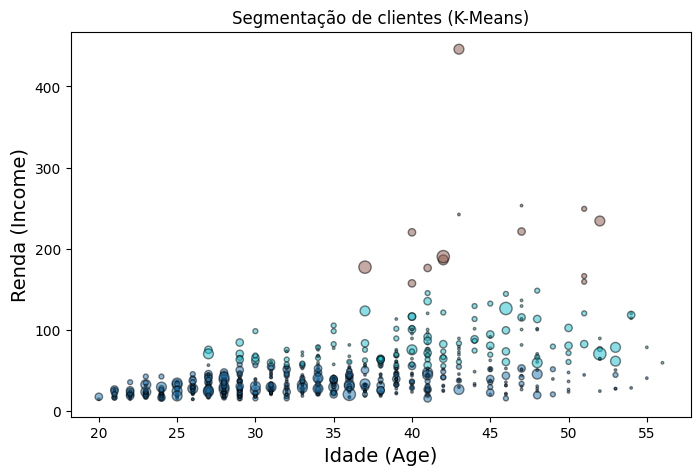

In [177]:
# Visualização 2D: Idade vs Renda

# Tentamos usar nomes de colunas (mais legível). Se não existirem, usamos fallback por posição.
if {"Age", "Income", "Edu"}.issubset(cust_df.columns):
    age = cust_df["Age"].to_numpy()
    income = cust_df["Income"].to_numpy()
    edu = cust_df["Edu"].to_numpy()
else:
    # Fallback: assume que as colunas estão em ordem similar à do dataset do curso
    age = X[:, 0]
    edu = X[:, 1]
    income = X[:, 3] if X.shape[1] > 3 else X[:, -1]

area = np.pi * (edu ** 2)

plt.figure(figsize=(8, 5))
plt.scatter(age, income, s=area, c=labels.astype(int), cmap="tab10", ec="k", alpha=0.5)
plt.xlabel("Idade (Age)", fontsize=14)
plt.ylabel("Renda (Income)", fontsize=14)
plt.title("Segmentação de clientes (K-Means)")
plt.show()


Também podemos visualizar em **3 dimensões** para entender melhor a separação: aqui a educação vira um eixo (em vez do tamanho do ponto).

In [178]:
# Visualização 3D interativa (Plotly)

if {"Edu", "Age", "Income"}.issubset(cust_df.columns):
    fig = px.scatter_3d(
        cust_df,
        x="Edu", y="Age", z="Income",
        color="Clus_km",
        opacity=0.7
    )
else:
    # Fallback por posição (Edu=1, Age=0, Income=3)
    z_col = 3 if X.shape[1] > 3 else -1
    fig = px.scatter_3d(
        x=X[:, 1], y=X[:, 0], z=X[:, z_col],
        color=labels.astype(int),
        opacity=0.7
    )

fig.update_traces(marker=dict(size=5, line=dict(width=0.25)), showlegend=False)
fig.update_layout(
    width=1000, height=800,
    scene=dict(
        xaxis=dict(title="Educação (Edu)"),
        yaxis=dict(title="Idade (Age)"),
        zaxis=dict(title="Renda (Income)")
    )
)
fig.show()


O K-Means particiona os clientes em grupos **mutuamente exclusivos** (ex.: 3 clusters).  
Clientes do mesmo cluster tendem a ser mais semelhantes (demograficamente, neste exemplo).

### Exercício 5

Criar um “perfil” para cada cluster (com base nas médias e nos gráficos) descrevendo características comuns.


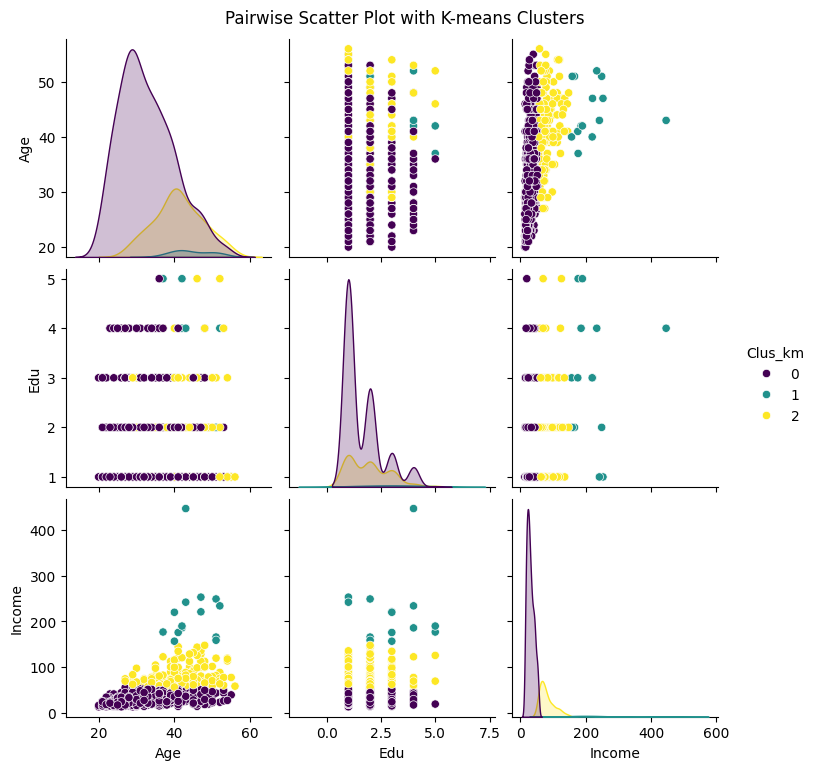

In [179]:
cust_df_sub = cust_df[['Age', 'Edu','Income','Clus_km']].copy()
sns.pairplot(cust_df_sub, hue='Clus_km', palette='viridis', diag_kind='kde')
plt.suptitle('Pairwise Scatter Plot with K-means Clusters', y=1.02)
plt.show()
